In [ ]:
import sys
sys.path.append("../../")
import time

import pandas as pd
import akshare as ak

/home/william/miniconda3/lib/python3.10/site-packages/akshare/__init__.py:2769: UserWarning: 为了支持更多特性，请将 Pandas 升级到 2.2.0 及以上版本！
  warnings.warn(


In [2]:
fund_etf_spot_em_df = ak.fund_etf_spot_em()
display(fund_etf_spot_em_df.head())
df=fund_etf_spot_em_df
df = df[df['流通市值']>df['流通市值'].median()]
df = df[df['成交额']>df['成交额'].median()]
df = df[abs(df['基金折价率'])<0.04]
len(df)

,代码,名称,最新价,IOPV实时估值,基金折价率,涨跌额,涨跌幅,成交量,成交额,开盘价,...,小单净流入-净额,小单净流入-净占比,现手,买一,卖一,最新份额,流通市值,总市值,数据日期,更新时间
0,560280,工程机械ETF,1.224,1.2227,-0.11,0.054,4.62,166520.0,2.007888e+07,1.163,...,-744735.0,-3.71,1.0,1.223,1.224,7.675200e+07,93944448,93944448,2024-05-09,2024-05-09 15:59:59+08:00
1,512670,国防ETF,0.645,0.6444,-0.09,0.027,4.37,2254770.0,1.429925e+08,0.618,...,-12144907.0,-8.49,64.0,0.644,0.645,3.388653e+09,2185680932,2185680932,2024-05-09,2024-05-09 16:00:01+08:00
2,159637,新能源车龙头ETF,0.573,0.5736,0.10,0.022,3.99,292915.0,1.674218e+07,0.557,...,-723696.0,-4.32,1517.0,0.572,0.573,1.794768e+09,1028402064,1028402064,2024-05-09,2024-05-09 15:34:42+08:00
3,513280,恒生生物科技ETF,0.653,0.6514,-0.25,0.024,3.82,609508.0,3.943476e+07,0.633,...,-757448.0,-1.92,-128.0,0.652,0.653,2.941145e+08,192056766,192056766,2024-05-09,2024-05-09 16:00:00+08:00
4,159567,港股创新药ETF,0.904,0.9130,0.99,0.033,3.79,1029028.0,9.249576e+07,0.880,...,-690018.0,-0.75,4412.0,0.903,0.904,1.733649e+08,156721836,156721836,2024-05-09,2024-05-09 15:34:51+08:00


43

In [3]:
# df=fund_etf_spot_em_df
# # df = df[df['流通市值']>df['流通市值'].median()]
# for i in df.index:
#     if '标普' in df.loc[i, '名称']:
#     # if '511010' in str(df.loc[i, '代码']):
#         print(df.loc[i,'代码'],df.loc[i,'名称'],df.loc[i,'成交额'], df.loc[i,'流通市值'], df.loc[i,'基金折价率'])

In [4]:
# s={
#     'code': ['510300', '588080', '159920', '513300', '513400', '513500', '510170', '518880', '511260'],
#     'name': ['沪深300ETF', '科创板50ETF','恒生ETF', '纳斯达克ETF', '道琼斯ETF', '标普500ETF', '大宗商品ETF', '黄金ETF', '上证10年期国债ETF'],
#     'category': ['中国指数', '中国指数', '中国指数', '外国指数', '外国指数', '外国指数', '商品', '商品', '债券']
# }
# assets = pd.DataFrame(s)

s={
    'code': ['510500',  '513500', '510170', '518880', '511260'],
    'desc': ['中证500ETF', '标普500ETF', '大宗商品ETF', '黄金ETF', '上证10年期国债ETF'],
    'name': ['China', 'USA', 'Comm', 'Gold', 'Bond'],
}
assets = pd.DataFrame(s)

In [6]:
assets_hist = None
for i in assets.index:
    name = assets.loc[i, 'name']
    etf_hist = ak.fund_etf_hist_em(symbol=assets.loc[i, 'code'], period="daily", start_date="20000101", end_date="20230201", adjust="hfq")
    time.sleep(1)
    if len(etf_hist)>0:
        print(name, etf_hist.iloc[0]['日期'], etf_hist.iloc[-1]['日期'])
    else:
        print(name, "No data")
        continue
    etf_close = etf_hist[['日期','收盘']].rename(columns={'收盘':name})
    if assets_hist is None:
        assets_hist =  etf_close
    else:
        assets_hist = pd.merge(assets_hist, etf_close, on='日期', how='outer')
assets_hist = assets_hist.dropna()
assets_hist = assets_hist.rename(columns={'日期':'Date'})
assets_hist.index = assets_hist['Date']
assets_hist.drop(columns=['Date'],inplace=True)
print(len(assets_hist))
assets_hist

China 2013-03-15 2023-02-01
USA 2014-01-15 2023-02-01
Comm 2011-01-25 2023-02-01
Gold 2013-07-29 2023-02-01
Bond 2017-08-24 2023-02-01
1288


,China,USA,Comm,Gold,Bond
Date,,,,,
2017-08-24,1.855,1.502,2.130,2.751,99.487
2017-08-25,1.875,1.502,2.133,2.749,99.809
2017-08-28,1.896,1.502,2.140,2.762,99.979
2017-08-29,1.890,1.494,2.121,2.792,99.773
2017-08-30,1.903,1.494,2.135,2.760,99.877
...,...,...,...,...,...
2023-01-19,2.001,2.496,3.424,4.068,118.829
2023-01-20,2.015,2.500,3.492,4.101,118.969
2023-01-30,2.022,2.568,3.484,4.096,119.049


<Axes: xlabel='Date'>

<Figure size 800x2000 with 0 Axes>

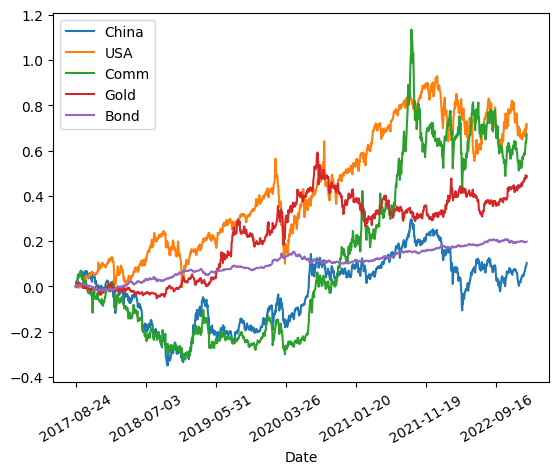

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(8,20))
d = assets_hist.copy()
d = (d-d.iloc[0])/d.iloc[0]
d.plot(rot=30)

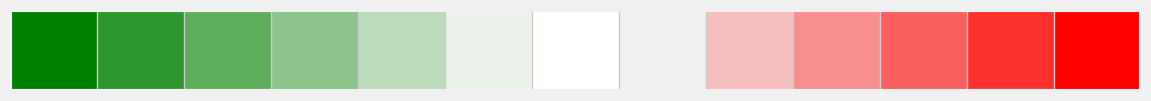

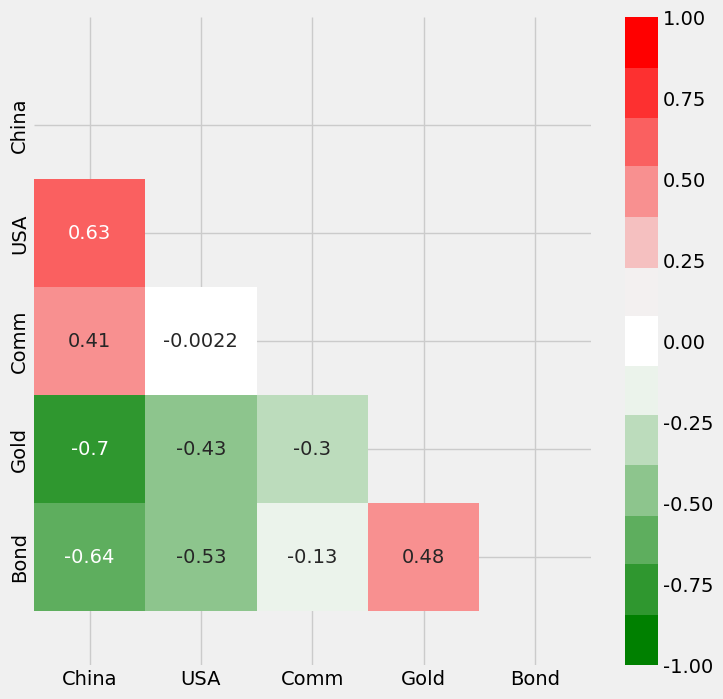

In [8]:
N=300
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
palette=sns.light_palette("green",reverse=True)+['w']+sns.light_palette("red")
sns.palplot(palette)
def plot_corr(corr):
    corr=corr.copy()
    # 相关系数表是对称的，所以只需要其中一半
    for i in range(len(corr)):
        r=corr.iloc[i]
        for j in range(i,len(r)):
            corr.iloc[i,j]=None
    sns.heatmap(corr, cmap=palette, vmin=-1, vmax=1, center=0, annot=True)
    # fix matplotlib cut off bug
    b, t = plt.ylim()
    plt.ylim(b+0.5, t-0.5)
    
plt.figure(figsize=(8,8))
corr = assets_hist.iloc[-N:].corr(method = 'pearson')
plot_corr(corr)

In [9]:
from macroquant.utils.common import *
filepath  = get_file_path('AssetsHistory.csv')
assets_hist.to_csv(str(filepath))